<a href="https://colab.research.google.com/github/maviverosp/PUC-Rio/blob/main/Final_Trabalho_de_redes_neurais__Maximiliano_Viveros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Redes Neuronais - RN 2022.1
Maximiliano Viveros | Matricula: 221.100.584

##1.- Por favor explique como funciona transfer learning em imagem de maneira breve.

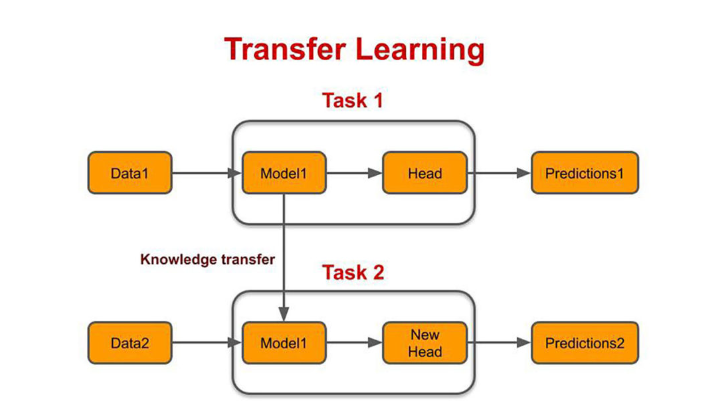

###**Resposta:**

Para começar, precisamos saber que a aprendizagem por transferência tem dois módulos:


1.   (*Model 1*) Módulo convolucional: módulo que trabalha com imagens, que filtra, que conhece nossas imagens.
2.   (*Head*) Módulo de redes neurais: classifica imagens.


*  **Data 1:** entrada de imagens.
*  **Model 1**: Usamos a rede convolucional, que sabe como diferenciar as imagens.  Cortamos o código deixando a parte da Head (rede neural).
* **Knowledge transfer:** Adaptamos um novo vetor, resultante da rede convolucional, com a rede neural que estará relacionada à quantidade de saídas necessárias.
* **Model 1 (transferido)**: A rede convolucional transferida receberá as novas fotos (talvez nunca vistas antes), mas tem um conhecimento prévio para diferenciar essas fotos, sendo aconselhável não receber como entrada fotos que exijam ajuste fino.
*   **NewHead:** Redes neurais "novas" adaptadas para o número (saída) de imagens.










##2.- No código mnist em anexo faça as seguintes mudanças. | Rode o código inicial e olhe os resultados

Biblioteca


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


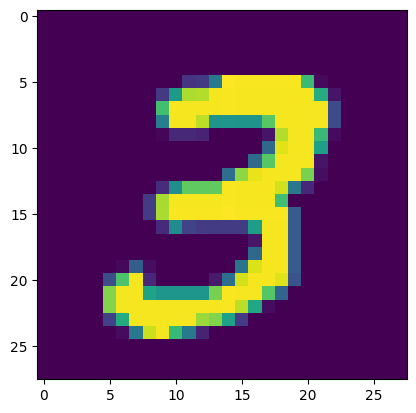

In [ ]:
#access first image
first_image = x_train[7]

first_image = np.array(first_image)
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)

## Construir o modelo como função

In [ ]:
optimizer = "adam"
dropout = 0.5

def rn_model(optimizer=optimizer, dropout=dropout):
  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation="softmax"),
    ]
  )
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model
  model.summary()

Criamos o repositório

In [ ]:
columns = ["Optimizer", "BatchSize", "DropOut", "Epochs", "TestLoss", "TestAccuracy", "History" ]
df_results = pd.DataFrame(columns=columns)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History


## Train the model: adam | batch_size = 128 | dropout = 0.5 | epochs = 15

In [ ]:
optimizer = "adam"
dropout = 0.5
batch_size = 128
epochs = 15

#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model = rn_model(optimizer=optimizer, dropout=dropout)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 6ms/step - loss: 0.3957 - accuracy: 0.8792 - val_loss: 0.0879 - val_accuracy: 0.9795
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1161 - accuracy: 0.9647 - val_loss: 0.0567 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0846 - accuracy: 0.9742 - val_loss: 0.0481 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.0462 - val_accuracy: 0.9862
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0606 - accuracy: 0.9809 - val_loss: 0.0382 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0356 - val_accuracy: 0.9917
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0337 - val_accuracy: 0.9918
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history.history.keys()

Test loss: 0.02350393496453762
Test accuracy: 0.9923999905586243


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'BatchSize': batch_size,
                            'DropOut': dropout,
                            "Epochs":epochs,
                            'TestLoss':score[0],
                            'TestAccuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."


## Train the model: adam | batch_size = 128 | dropout = 0.2 | epochs = 15

In [ ]:
optimizer = "adam"
batch_size = 128
dropout = 0.2
epochs = 15

#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model = rn_model(optimizer=optimizer, dropout=dropout)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 6ms/step - loss: 0.3132 - accuracy: 0.9080 - val_loss: 0.0758 - val_accuracy: 0.9792
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0949 - accuracy: 0.9708 - val_loss: 0.0587 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0701 - accuracy: 0.9779 - val_loss: 0.0490 - val_accuracy: 0.9863
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 0.0445 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0356 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0442 - val_accuracy: 0.9865
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history.history.keys()

Test loss: 0.027293140068650246
Test accuracy: 0.9918000102043152


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'BatchSize': batch_size,
                            'DropOut': dropout,
                            "Epochs":epochs,
                            'TestLoss':score[0],
                            'TestAccuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."
1,adam,128,0.2,15,0.027293,0.9918,"{'loss': [0.3131848871707916, 0.09492282569408..."


## Train the model: adam | batch_size = 256 | dropout = 0.5 | epochs = 15

*   List item
*   List item



In [ ]:
optimizer = "adam"
batch_size = 256
dropout = 0.5
epochs = 15

#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model = rn_model(optimizer=optimizer, dropout=dropout)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 3s 9ms/step - loss: 0.5031 - accuracy: 0.8479 - val_loss: 0.1054 - val_accuracy: 0.9700
Epoch 2/15
211/211 [==============================] - 1s 7ms/step - loss: 0.1441 - accuracy: 0.9560 - val_loss: 0.0742 - val_accuracy: 0.9787
Epoch 3/15
211/211 [==============================] - 1s 7ms/step - loss: 0.1062 - accuracy: 0.9679 - val_loss: 0.0563 - val_accuracy: 0.9845
Epoch 4/15
211/211 [==============================] - 1s 7ms/step - loss: 0.0851 - accuracy: 0.9742 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 5/15
211/211 [==============================] - 1s 7ms/step - loss: 0.0746 - accuracy: 0.9765 - val_loss: 0.0474 - val_accuracy: 0.9862
Epoch 6/15
211/211 [==============================] - 1s 6ms/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0465 - val_accuracy: 0.9860
Epoch 7/15
211/211 [==============================] - 1s 7ms/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.0387 - val_accuracy: 0.9898
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history.history.keys()

Test loss: 0.028717990964651108
Test accuracy: 0.9905999898910522


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'BatchSize': batch_size,
                            'DropOut': dropout,
                            "Epochs":epochs,
                            'TestLoss':score[0],
                            'TestAccuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."
1,adam,128,0.2,15,0.027293,0.9918,"{'loss': [0.3131848871707916, 0.09492282569408..."
2,adam,256,0.5,15,0.028718,0.9906,"{'loss': [0.5031101107597351, 0.14406166970729..."


## Train the model: adam | batch_size = 256 | dropout = 0.2 | epochs = 15

---




In [ ]:
optimizer = "adam"
batch_size = 256
dropout = 0.2
epochs = 15

#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model = rn_model(optimizer=optimizer, dropout=dropout)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 3s 8ms/step - loss: 0.4565 - accuracy: 0.8663 - val_loss: 0.0984 - val_accuracy: 0.9735
Epoch 2/15
211/211 [==============================] - 1s 7ms/step - loss: 0.1107 - accuracy: 0.9667 - val_loss: 0.0701 - val_accuracy: 0.9803
Epoch 3/15
211/211 [==============================] - 1s 7ms/step - loss: 0.0794 - accuracy: 0.9749 - val_loss: 0.0548 - val_accuracy: 0.9847
Epoch 4/15
211/211 [==============================] - 1s 7ms/step - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0469 - val_accuracy: 0.9867
Epoch 5/15
211/211 [==============================] - 1s 7ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.0457 - val_accuracy: 0.9887
Epoch 6/15
211/211 [==============================] - 1s 7ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0465 - val_accuracy: 0.9873
Epoch 7/15
211/211 [==============================] - 2s 7ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0412 - val_accuracy: 0.9890
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history.history.keys()

Test loss: 0.03162320703268051
Test accuracy: 0.9907000064849854


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'BatchSize': batch_size,
                            'DropOut': dropout,
                            "Epochs":epochs,
                            'TestLoss':score[0],
                            'TestAccuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."
1,adam,128,0.2,15,0.027293,0.9918,"{'loss': [0.3131848871707916, 0.09492282569408..."
2,adam,256,0.5,15,0.028718,0.9906,"{'loss': [0.5031101107597351, 0.14406166970729..."
3,adam,256,0.2,15,0.031623,0.9907,"{'loss': [0.45648249983787537, 0.1106853857636..."


## Train the model: sgd | batch_size = 128 | dropout = 0.5 | epochs = 15



In [ ]:
optimizer = "sgd"
batch_size = 128
dropout = 0.5
epochs = 15

#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model = rn_model(optimizer=optimizer, dropout=dropout)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 7ms/step - loss: 1.7659 - accuracy: 0.4365 - val_loss: 0.6133 - val_accuracy: 0.8618
Epoch 2/15
422/422 [==============================] - 3s 6ms/step - loss: 0.6225 - accuracy: 0.8034 - val_loss: 0.2814 - val_accuracy: 0.9312
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3922 - accuracy: 0.8802 - val_loss: 0.2034 - val_accuracy: 0.9487
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3080 - accuracy: 0.9075 - val_loss: 0.1682 - val_accuracy: 0.9528
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2629 - accuracy: 0.9199 - val_loss: 0.1462 - val_accuracy: 0.9618
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2318 - accuracy: 0.9307 - val_loss: 0.1314 - val_accuracy: 0.9647
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2101 - accuracy: 0.9370 - val_loss: 0.1223 - val_accuracy: 0.9673
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history.history.keys()

Test loss: 0.08849430084228516
Test accuracy: 0.9726999998092651


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'BatchSize': batch_size,
                            'DropOut': dropout,
                            "Epochs":epochs,
                            'TestLoss':score[0],
                            'TestAccuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."
1,adam,128,0.2,15,0.027293,0.9918,"{'loss': [0.3131848871707916, 0.09492282569408..."
2,adam,256,0.5,15,0.028718,0.9906,"{'loss': [0.5031101107597351, 0.14406166970729..."
3,adam,256,0.2,15,0.031623,0.9907,"{'loss': [0.45648249983787537, 0.1106853857636..."
4,sgd,128,0.5,15,0.088494,0.9727,"{'loss': [1.7659237384796143, 0.62254703044891..."


## Train the model: sgd | batch_size = 128 | dropout = 0.2 | epochs = 15

In [ ]:
optimizer = "sgd"
batch_size = 128
dropout = 0.2
epochs = 15

#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model = rn_model(optimizer=optimizer, dropout=dropout)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 6ms/step - loss: 1.4322 - accuracy: 0.5949 - val_loss: 0.4436 - val_accuracy: 0.8802
Epoch 2/15
422/422 [==============================] - 3s 6ms/step - loss: 0.4838 - accuracy: 0.8514 - val_loss: 0.2624 - val_accuracy: 0.9305
Epoch 3/15
422/422 [==============================] - 2s 6ms/step - loss: 0.3492 - accuracy: 0.8938 - val_loss: 0.2057 - val_accuracy: 0.9445
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2739 - accuracy: 0.9175 - val_loss: 0.1642 - val_accuracy: 0.9548
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2263 - accuracy: 0.9326 - val_loss: 0.1384 - val_accuracy: 0.9630
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1978 - accuracy: 0.9409 - val_loss: 0.1228 - val_accuracy: 0.9695
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1745 - accuracy: 0.9477 - val_loss: 0.1122 - val_accuracy: 0.9695
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history.history.keys()

Test loss: 0.07679439336061478
Test accuracy: 0.9775999784469604


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'BatchSize': batch_size,
                            'DropOut': dropout,
                            "Epochs":epochs,
                            'TestLoss':score[0],
                            'TestAccuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."
1,adam,128,0.2,15,0.027293,0.9918,"{'loss': [0.3131848871707916, 0.09492282569408..."
2,adam,256,0.5,15,0.028718,0.9906,"{'loss': [0.5031101107597351, 0.14406166970729..."
3,adam,256,0.2,15,0.031623,0.9907,"{'loss': [0.45648249983787537, 0.1106853857636..."
4,sgd,128,0.5,15,0.088494,0.9727,"{'loss': [1.7659237384796143, 0.62254703044891..."
5,sgd,128,0.2,15,0.076794,0.9776,"{'loss': [1.4321998357772827, 0.48380517959594..."


## Train the model: sgd | batch_size = 256 | dropout = 0.5 | epochs = 15

In [ ]:
optimizer = "sgd"
batch_size = 256
dropout = 0.5
epochs = 15

#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model = rn_model(optimizer=optimizer, dropout=dropout)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 2s 8ms/step - loss: 2.0724 - accuracy: 0.3449 - val_loss: 1.4435 - val_accuracy: 0.7783
Epoch 2/15
211/211 [==============================] - 1s 7ms/step - loss: 1.0264 - accuracy: 0.6947 - val_loss: 0.4733 - val_accuracy: 0.8917
Epoch 3/15
211/211 [==============================] - 2s 8ms/step - loss: 0.6043 - accuracy: 0.8138 - val_loss: 0.3160 - val_accuracy: 0.9193
Epoch 4/15
211/211 [==============================] - 2s 7ms/step - loss: 0.4599 - accuracy: 0.8612 - val_loss: 0.2517 - val_accuracy: 0.9335
Epoch 5/15
211/211 [==============================] - 2s 7ms/step - loss: 0.3833 - accuracy: 0.8844 - val_loss: 0.2141 - val_accuracy: 0.9435
Epoch 6/15
211/211 [==============================] - 1s 7ms/step - loss: 0.3327 - accuracy: 0.9011 - val_loss: 0.1889 - val_accuracy: 0.9498
Epoch 7/15
211/211 [==============================] - 1s 7ms/step - loss: 0.2994 - accuracy: 0.9103 - val_loss: 0.1707 - val_accuracy: 0.9540
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history.history.keys()

Test loss: 0.12155993282794952
Test accuracy: 0.9656999707221985


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'BatchSize': batch_size,
                            'DropOut': dropout,
                            "Epochs":epochs,
                            'TestLoss':score[0],
                            'TestAccuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."
1,adam,128,0.2,15,0.027293,0.9918,"{'loss': [0.3131848871707916, 0.09492282569408..."
2,adam,256,0.5,15,0.028718,0.9906,"{'loss': [0.5031101107597351, 0.14406166970729..."
3,adam,256,0.2,15,0.031623,0.9907,"{'loss': [0.45648249983787537, 0.1106853857636..."
4,sgd,128,0.5,15,0.088494,0.9727,"{'loss': [1.7659237384796143, 0.62254703044891..."
5,sgd,128,0.2,15,0.076794,0.9776,"{'loss': [1.4321998357772827, 0.48380517959594..."
6,sgd,256,0.5,15,0.121560,0.9657,"{'loss': [2.072413921356201, 1.026389598846435..."


## Train the model: sgd | batch_size = 256 | dropout = 0.2 | epochs = 15

In [ ]:
optimizer = "sgd"
batch_size = 256
dropout = 0.2
epochs = 15

#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model = rn_model(optimizer=optimizer, dropout=dropout)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 2s 8ms/step - loss: 2.1452 - accuracy: 0.3395 - val_loss: 1.6698 - val_accuracy: 0.7010
Epoch 2/15
211/211 [==============================] - 1s 7ms/step - loss: 0.9895 - accuracy: 0.7278 - val_loss: 0.4735 - val_accuracy: 0.8798
Epoch 3/15
211/211 [==============================] - 1s 6ms/step - loss: 0.5515 - accuracy: 0.8299 - val_loss: 0.3267 - val_accuracy: 0.9140
Epoch 4/15
211/211 [==============================] - 1s 7ms/step - loss: 0.4401 - accuracy: 0.8644 - val_loss: 0.2687 - val_accuracy: 0.9267
Epoch 5/15
211/211 [==============================] - 1s 7ms/step - loss: 0.3755 - accuracy: 0.8875 - val_loss: 0.2315 - val_accuracy: 0.9383
Epoch 6/15
211/211 [==============================] - 2s 8ms/step - loss: 0.3305 - accuracy: 0.9008 - val_loss: 0.2053 - val_accuracy: 0.9440
Epoch 7/15
211/211 [==============================] - 2s 8ms/step - loss: 0.2943 - accuracy: 0.9112 - val_loss: 0.1842 - val_accuracy: 0.9500
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history.history.keys()

Test loss: 0.12356733530759811
Test accuracy: 0.9639999866485596


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'BatchSize': batch_size,
                            'DropOut': dropout,
                            "Epochs":epochs,
                            'TestLoss':score[0],
                            'TestAccuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)
df_results

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."
1,adam,128,0.2,15,0.027293,0.9918,"{'loss': [0.3131848871707916, 0.09492282569408..."
2,adam,256,0.5,15,0.028718,0.9906,"{'loss': [0.5031101107597351, 0.14406166970729..."
3,adam,256,0.2,15,0.031623,0.9907,"{'loss': [0.45648249983787537, 0.1106853857636..."
4,sgd,128,0.5,15,0.088494,0.9727,"{'loss': [1.7659237384796143, 0.62254703044891..."
5,sgd,128,0.2,15,0.076794,0.9776,"{'loss': [1.4321998357772827, 0.48380517959594..."
6,sgd,256,0.5,15,0.121560,0.9657,"{'loss': [2.072413921356201, 1.026389598846435..."
7,sgd,256,0.2,15,0.123567,0.9640,"{'loss': [2.1451871395111084, 0.98950892686843..."


##Gráficos e análise de resultados

In [ ]:
df_results.sort_values(by='TestAccuracy', ascending=False)

,Optimizer,BatchSize,DropOut,Epochs,TestLoss,TestAccuracy,History
0,adam,128,0.5,15,0.023504,0.9924,"{'loss': [0.3956788182258606, 0.11613477766513..."
1,adam,128,0.2,15,0.027293,0.9918,"{'loss': [0.3131848871707916, 0.09492282569408..."
3,adam,256,0.2,15,0.031623,0.9907,"{'loss': [0.45648249983787537, 0.1106853857636..."
2,adam,256,0.5,15,0.028718,0.9906,"{'loss': [0.5031101107597351, 0.14406166970729..."
5,sgd,128,0.2,15,0.076794,0.9776,"{'loss': [1.4321998357772827, 0.48380517959594..."
4,sgd,128,0.5,15,0.088494,0.9727,"{'loss': [1.7659237384796143, 0.62254703044891..."
6,sgd,256,0.5,15,0.121560,0.9657,"{'loss': [2.072413921356201, 1.026389598846435..."
7,sgd,256,0.2,15,0.123567,0.9640,"{'loss': [2.1451871395111084, 0.98950892686843..."


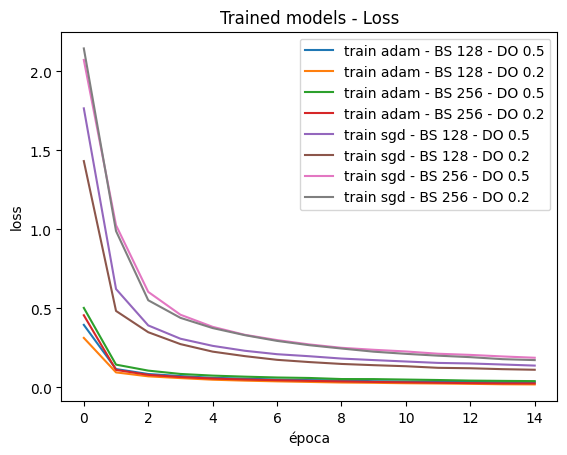

In [ ]:
for i, row in df_results.iterrows():

  label = f"train {row['Optimizer']} - BS {row['BatchSize']} - DO {row['DropOut']}"
  plt.plot(row["History"]['loss'], label=label)


plt.title('Trained models - Loss')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

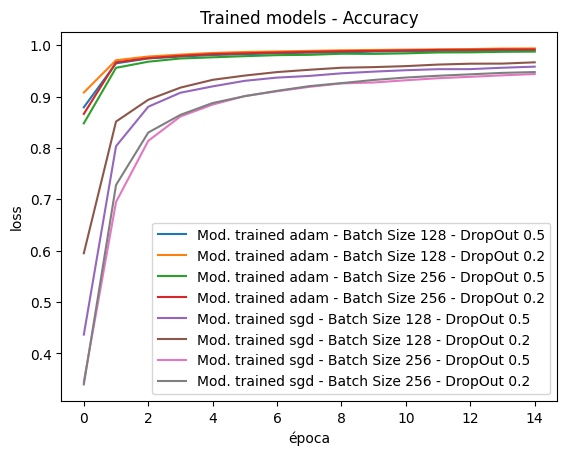

In [ ]:
for i, row in df_results.iterrows():

  label = f"Mod. trained {row['Optimizer']} - Batch Size {row['BatchSize']} - DropOut {row['DropOut']}"
  plt.plot(row["History"]['accuracy'], label=label)


plt.title('Trained models - Accuracy')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

Conclusão:


In [ ]:
A vista que con el optimizador Adam, entre 4 y 6 epocas ya se obtiene un numero aprox. definitivo en la Accuracy y Loss. Pudiendo prevenir un sobreajuste del modelo y recursos computacionales.
Recordando el objetivo de la Red Neuronal es minimizar el error entre entrada y la salida, si llega a 0 simplemente encontre l asolucion de la funcion pero nunca va a llegar a ser 0.
Es una función uniforme y con esto podemos destacar que esta generalizando bien.


##ChatBot


In [ ]:
!pip install transformers

##Base de Conhecimento

In [ ]:
import transformers
from transformers import pipeline

# source: https://www.fifa.com/fifaplus/pt/tournaments/mens/fifa-club-world-cup/saudi-arabia-2023/articles/final-copa-libertadores-2023-fluminense-boca-juniors-resumo
context = r"""
A emoção é extrema: o Fluminense é campeão da Copa Libertadores e será o representante da CONMEBOL na Copa do Mundo de Clubes da FIFA™ em 2023! O Tricolor das Laranjeiras venceu um jogo de testar qualquer coração, batendo o Boca Juniors por 2 a 1. Os gols foram de Germán Cano e John Kennedy neste sábado histórico, 4 de novembro de 2023, valendo a conquista do título continental pela primeira vez em pleno Maracanã.
Embora o estádio esteja no coração da torcida do Fluminense, desta vez, os assentos do mítico Maracanã ficaram divididos entre torcedores dos dois times na condição de campo "neutro". Mas o destino, caprichoso, quis que a torcida brasileira comemorasse o gol de seu argentino favorito em um dos locais mais sagrados do futebol do Brasil, e foi assim que metade do público explodiu em euforia aos 35 minutos do primeiro tempo.
Neste momento, Keno tabelou com Arias, avançou pela direita e cruzou rasteiro (e para trás) para Germán Cano, que, na marca do pênalti, chutou de primeira e balançou a rede. O goleiro Romero não alcançou o cantinho e não conseguiu impedir a festa do artilheiro da Libertadores 2023 e sua homenagem aos filhos. Placar de 1 a 0.
É importante destacar que Cano não apenas estava "no lugar certo e na hora certa". O goleador leu os espaços e se deslocou de forma inteligente para enganar a defesa adversária. Primeiro, enquanto os companheiros de Fluminense tabelavam pela direita, ele disparou em direção ao gol para atrair a marcação; depois, correu de volta para trás no último segundo possível para receber o passe de Keno praticamente desmarcado.
Um pouco mais livre que Luis Advíncula, autor do gol do empate do Boca aos 26 minutos do segundo tempo. O ala peruano recebeu a bola pela direita e descobriu que podia carregá-la para o meio com certa liberdade, sem ser parado, antes de disparar um chute perfeito e cheio de efeito. Placar de 1 a 1.
Em desvantagem no placar, o Boca tentava construir no ataque, mas, com a igualdade de 10 atletas para cada time, o Fluminense se aproveitava dos contragolpes e assustava. O Maracanã quase entrou em combustão novamente quando Guga (bem lançado por Arias) carimbou a trave.
A bola no poste serviu para dar mais emoção à reta final do jogo, mas não prejudicou os sonhos do Fluminense: o Tricolor garantiu o placar por 2 a 1 e se tornou campeão da Copa Libertadores da América pela primeira vez em 2023.

"""

In [ ]:
model_name = 'pierreguillou/bert-large-cased-squad-v1.1-portuguese'
nlp = pipeline("question-answering", model=model_name)

question = "Por quantos gols o Fluminense venceu o Boca Juniors?"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

config.json:   0%|          | 0.00/918 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Answer: '2 a 1', score: 0.7856, start: 242, end: 247


In [ ]:
question = "Quem foi autor do gol no Boca Juniors"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'Germán Cano e John Kennedy', score: 0.4258, start: 266, end: 292


In [ ]:
question = "Quantas vezes o Fluminense ganhou a Copa Libertadores da América?"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: '2023', score: 0.0234, start: 334, end: 338


In [ ]:
question = "Quantos jogadores foram expulsos da partida?"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: '.', score: 0.0206, start: 417, end: 418


In [ ]:
question = "Quem marcou gols no jogo?"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'Germán Cano e John Kennedy', score: 0.934, start: 266, end: 292


In [ ]:
question = "Quem marcou gols no jogo?"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")